In [88]:
!unzip -q "/content/drive/MyDrive/DATA/archive.zip"

replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [89]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")

In [90]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [91]:
df.shape

(284807, 31)

In [92]:
#checking data imbalance
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
#checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [95]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [96]:
print('No Frauds', round(df['Class'].value_counts()[0],2), 'are normal transactions')
print('Frauds', round(df['Class'].value_counts()[1],2), 'are fraud')

No Frauds 284315 are normal transactions
Frauds 492 are fraud


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '(0: No Fraud || 1: Fraud)')

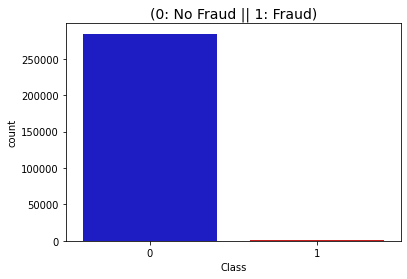

In [97]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('(0: No Fraud || 1: Fraud)', fontsize=14)

In [98]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'], axis=1, inplace=True)

In [99]:
scaled_amount = df['scaled_amount']

df.drop(['scaled_amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)

In [100]:
ss = StratifiedShuffleSplit(n_splits=1,
                            test_size=0.2,
                            train_size=0.8,
                            random_state=42)

In [101]:
X = df.drop('Class', axis=1)
y = df['Class']

In [103]:
for train_index, test_index in ss.split(X, y):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

In [105]:
train_df = train_df.sample(frac=1)
train_df.Class.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [106]:
fraud_df = train_df.loc[train_df['Class'] == 1]
non_fraud_df = train_df.loc[train_df['Class'] == 0][:394]

In [107]:
print(fraud_df.shape,non_fraud_df.shape)

(394, 31) (394, 31)


In [113]:
normal_df = pd.concat([fraud_df, non_fraud_df])
df2 = normal_df.sample(frac=1, random_state=42)

In [114]:
print(df2.shape)

(788, 31)


In [115]:
X_train = df2.drop('Class', axis=1)
y_train = df2['Class']

X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

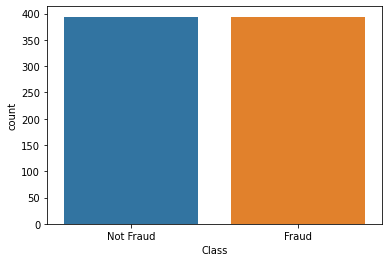

In [116]:
fig = sns.countplot(x = 'Class', data = normal_df)
fig.set_xticklabels(labels=['Not Fraud', 'Fraud'], rotation=0);

In [117]:
normal_df.head()

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
208651,0.243834,137211.0,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,-0.717418,-5.179935,2.867029,-5.259996,-1.277151,-6.989272,0.690010,-5.496188,-5.995337,-3.990515,-0.167200,0.357369,0.621622,0.043807,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,1
222419,-0.307413,142961.0,0.457845,1.373769,-0.488926,2.805351,1.777386,0.100492,1.295016,-0.135857,-1.695822,0.955004,-1.702228,-0.240056,0.456475,0.139567,-1.890974,0.372379,-0.798201,-0.697062,-1.497152,-0.264705,0.105593,0.371014,0.051105,0.401524,-0.724766,-0.202881,0.092124,0.094956,1
153823,-0.275554,100223.0,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,-18.913243,4.971249,-12.686308,-1.071443,-7.383370,-2.992430,-8.582309,-13.806568,-6.000359,1.422632,3.834649,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,1
223366,-0.293440,143354.0,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,-2.732792,3.274075,-3.541687,-0.946820,-7.555729,-1.767005,-0.642333,-2.114429,0.183327,-1.177793,0.163513,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1
143335,3.226717,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


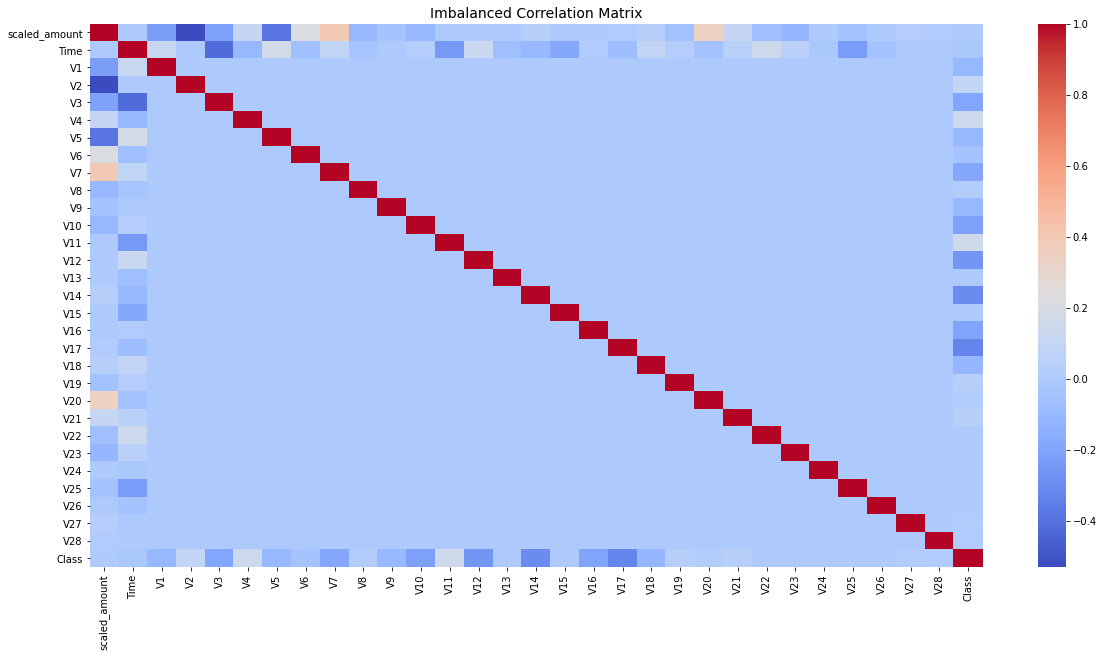

In [118]:
#imbalance data correlation
fig, ax = plt.subplots(figsize=(20,10)) 
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

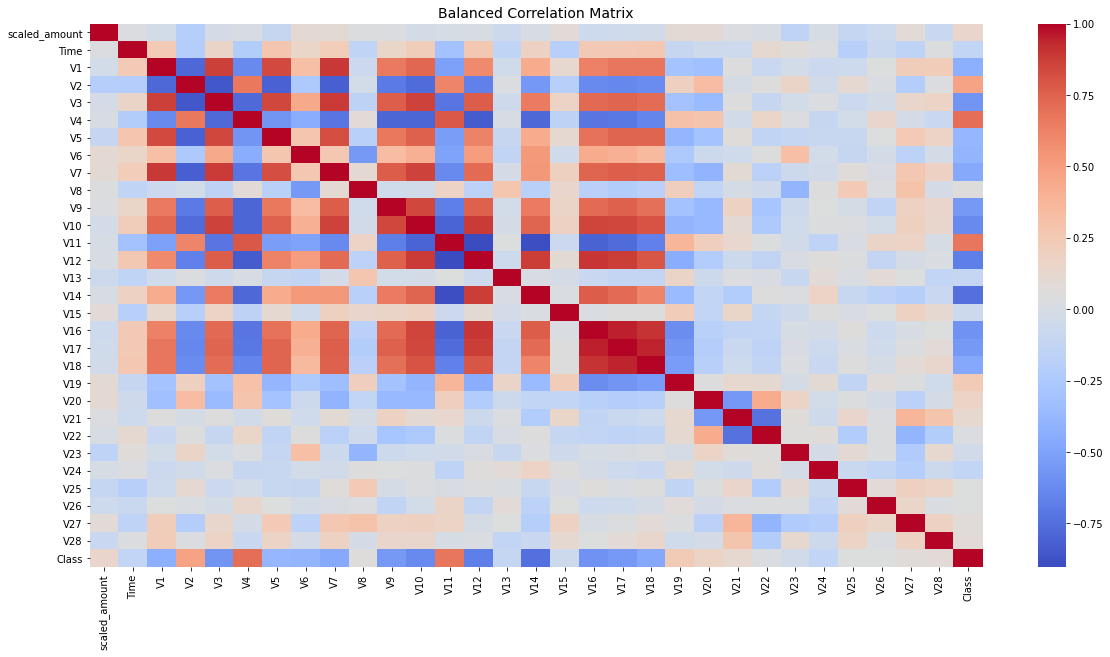

In [119]:
#balance data correlation
fig, ax = plt.subplots(figsize=(20,10)) 
corr = normal_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot_kws={'size':30}, ax=ax)
ax.set_title("Balanced Correlation Matrix", fontsize=14)
plt.show()

In [160]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [161]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [162]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [165]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [167]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [171]:
from sklearn.metrics import (f1_score, roc_auc_score,confusion_matrix, accuracy_score,
                             precision_score, recall_score)
from IPython.display import HTML, display
import tabulate

In [179]:
def predict_and_evaluate(model, X_test, y_test):
  
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    metrics = [round(accuracy,2), round(precision,2), round(recall,2), round(f1,2),fp,fn]
    table = [[model.__class__.__name__] + metrics]
    display(HTML(tabulate.tabulate(table,headers=('Algorithm','Accuracy', 
                                                   'Precision', 
                                                  'Recall', 'F1 Score','False Positives','False Negatives'), 
                                   tablefmt='html')))
    
    return [model.__class__.__name__] + metrics

In [180]:
svm_res = predict_and_evaluate(svm_clf, X_test, y_test)
xgb_res = predict_and_evaluate(xgb, X_test, y_test)
lr_res = predict_and_evaluate(lr, X_test, y_test)
rf_res = predict_and_evaluate(rf, X_test, y_test)
dc_res = predict_and_evaluate(dc, X_test, y_test)
knn_res = predict_and_evaluate(knn, X_test, y_test)
gnb_res = predict_and_evaluate(gnb, X_test, y_test)
abc_res = predict_and_evaluate(abc, X_test, y_test)

Algorithm,Accuracy,Precision,Recall,F1 Score,False Positives,False Negatives
SVC,0.78,0,0.4,0.01,12202,59


Algorithm,Accuracy,Precision,Recall,F1 Score,False Positives,False Negatives
XGBClassifier,0.96,0.04,0.92,0.07,2271,8


Algorithm,Accuracy,Precision,Recall,F1 Score,False Positives,False Negatives
LogisticRegression,0.94,0.03,0.92,0.05,3229,8


Algorithm,Accuracy,Precision,Recall,F1 Score,False Positives,False Negatives
RandomForestClassifier,0.97,0.05,0.92,0.1,1621,8


Algorithm,Accuracy,Precision,Recall,F1 Score,False Positives,False Negatives
DecisionTreeClassifier,0.91,0.02,0.89,0.03,5073,11


Algorithm,Accuracy,Precision,Recall,F1 Score,False Positives,False Negatives
KNeighborsClassifier,0.63,0,0.78,0.01,21001,22


Algorithm,Accuracy,Precision,Recall,F1 Score,False Positives,False Negatives
GaussianNB,0.98,0.07,0.74,0.14,908,25


Algorithm,Accuracy,Precision,Recall,F1 Score,False Positives,False Negatives
AdaBoostClassifier,0.94,0.03,0.92,0.05,3219,8


In [184]:
display(HTML('<h3>Summary:</h3>'))
table = [svm_res,xgb_res,lr_res,rf_res,dc_res,knn_res,gnb_res,abc_res]
display(HTML(tabulate.tabulate(table,headers=('Algorithm','Accuracy', 
                                                   'Precision', 
                                                  'Recall', 'F1 Score','False Positives','False Negatives'),
                               tablefmt='html')))

Algorithm,Accuracy,Precision,Recall,F1 Score,False Positives,False Negatives
SVC,0.78,0,0.4,0.01,12202,59
XGBClassifier,0.96,0.04,0.92,0.07,2271,8
LogisticRegression,0.94,0.03,0.92,0.05,3229,8
RandomForestClassifier,0.97,0.05,0.92,0.1,1621,8
DecisionTreeClassifier,0.91,0.02,0.89,0.03,5073,11
KNeighborsClassifier,0.63,0,0.78,0.01,21001,22
GaussianNB,0.98,0.07,0.74,0.14,908,25
AdaBoostClassifier,0.94,0.03,0.92,0.05,3219,8
